# Assignement 4: Logistic Regression

이번 과제에서는 **logistic regression**을 사용하여 학생들의 입학 가능 여부를 결정하는 모델을 만들어봅시다.

여러분은 학생들의 입학 성적을 기반으로 합격 가능성을 분석하는 업무를 받았습니다.
학생들은 두 번 시험을 보며, 시험 결과에 따라 입학 여부가 결정이 됩니다.
지난 학생들의 시험 및 합격 기록을 참고하여, 새로운 학생의 시험 결과가 주어졌을 때 합격 여부를 판단하는 모델을 만들어보세요.

*Dataset from Andrew Ng's coursera lecture*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Question 1. 학생들의 이전 기록 데이터를 불러와 train_data에 저장하세요. 

이전 학생들의 입학 기록 데이터는 ex2data1.txt에 있습니다.

In [2]:
# Put your code
train_data = np.loadtxt('ex2data1.txt', delimiter=',')
x1 = train_data[:, 0]
x2 = train_data[:, 1]
y  = train_data[:, 2]
train_data.shape

(100, 3)

## Question 2. 우선 데이터가 어떻게 분포되어 있는지 확인해볼까요? 

불러온 train_data는 아래와 같이 구성되어 있습니다. (합격인 경우, Admission은 1로 표시합니다.)

| Exam 1 | Exam 2 | Admission |
| --- | --- | --- |
|34.62 | 78.02 | 0 |

Exam 1, Exam 2를 각각 x,y 축으로 놓고, Admission의 결과에 따라 1인 경우 파란 삼각형, 0인 경우 노란 사각형으로 표시하세요.([Hint](https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py))

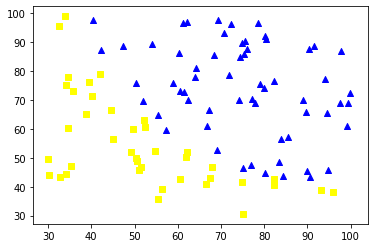

In [3]:
y0 = np.where(y == 0)
y1 = np.where(y == 1)
for y_ in y0:
    plt.scatter(x1[y_], x2[y_], color= 'yellow', marker='s')
for y_ in y1:
    plt.scatter(x1[y_], x2[y_], color='b', marker='^') 

# Logistic Regression

Logistic regression의 중심에는 sigmoid function이 있습니다.
sigmoid function g(z)는 다음과 같습니다.

$$g(z) = {1 \over {1 + e^{-z}}}$$

## Question 3. Sigmoid function을 구현해보자.


In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
sigmoid(0) #DEBUG

0.5

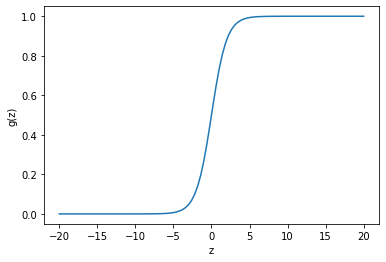

In [6]:
def plot_sigmoid():
    x = np.linspace(-20, 20, 100)
    plt.plot(x, sigmoid(x))
    plt.xlabel('z')
    plt.ylabel('g(z)')
plot_sigmoid()

정상적으로 sigmoid 함수를 구현하였다면, 아래의 그림과 동일한 그래프를 볼 수 있을 것입니다.

<img src='figure/sigmoid.png'>

이제부터 logistic regression 함수를 살펴봅시다. 
logistic regression은 주어진 입력 데이터 x에 대해 어떤 클래스 y (1 또는 0)에 속하는지 분류하는 모델로,
n개의 파라미터에 대한 모델 $H_{\theta}(x)$는 다음과 같이 표현됩니다.

$$H_{\theta}(x) = g(z), g(z) = \sum_{i=0}^{n} \theta_{i}x_{i} $$
$H_{\theta}(x)$의 의미는 x값이 주어졌을 때, y가 1일 확률을 나타냅니다. 
$H_{\theta}(x) > p$를 만족하는 경우 y = 1이라 판단을 하며, 보통 p를 0.5로 두고 사용합니다.

sigmoid 그래프를 보면 z값이 0을 기준으로 결과 같이 나뉘어 지는 것을 볼 수 있습니다.
logistic regression 모델에서는 학습을 통해 결과적으로 z값을 특정 클래스에 따라 음수와 양수로 맵핑하는 선형함수를 찾게 됩니다.

## Question 4. Cost Fucntion

학습 데이터 m개가 주어졌을 때, 모델 $H_{\theta}(x)$에 대한 cost function $J(\theta)$는 아래와 같습니다. 

$$J(\theta) = -{1 \over m} \sum_{i=1}^m [y^{(i)}logH_{\theta}(x^{(i)}) + (1-y^{(i)})log(1 - H_{\theta}(x))]$$

위의 cost function은 log-likelihood를 사용하여 구할 수 있습니다 (cost function은 log-likelihood 함수에 -1을 곱하여 얻을 수 있습니다.). 자세한 내용은 수업 슬라이드를 참조하세요.

Cost function을 구하시오.

In [7]:
def cost_function(params, train_data, train_labels):
    '''
    theta.shape = (3, 1)
    train_data.shape = (100, 3)
    train_labels.shape = (100, 1)
    '''
    '''
    Input: params, model parameters
           train_data, input features
           train_labels, input lables
    '''
    Hx = sigmoid(np.dot(train_data, params)) # Hx.shape = (100, 1)
    cost = np.dot(np.transpose(train_labels),np.log(Hx)) + np.dot(1 - np.transpose(train_labels), np.log(1 - Hx))
    return -cost.item() / len(train_data)

X_ = train_data[:, :2]
X = np.concatenate(
    (np.ones((train_data.shape[0], 1)), X_), axis=1)
y = train_data[:, 2, np.newaxis]
def test_cost_function():
    theta = np.zeros((X.shape[1], 1))
    initial_cost = cost_function(theta, X, y)
    print("Expected initial cost with 0-value parameters: 0.69.")
    print("Your cost function returns %.2f." % initial_cost)

    test_theta = np.array([0.09, 0.44, -0.33]).reshape(3, 1)
    test_cost = cost_function(test_theta, X, y)
    print("Expected initial cost with parameters [0.09, 0.44, -0.33]: 3.57.")
    print("Your cost function returns %.2f." % test_cost)
test_cost_function()

Expected initial cost with 0-value parameters: 0.69.
Your cost function returns 0.69.
Expected initial cost with parameters [0.09, 0.44, -0.33]: 3.57.
Your cost function returns 3.57.


## Question 5. Gradient descent algorithm을 구현하여 모델의 파라미터를 찾고, gradient descent 과정에서 cost function의 변화를 그래프로 출력하세요. (업데이트 회수 niter = 500, learning rate alpha=0.001을 사용하세요.)

 cost function을 최소화 하는 파라미터 **$\theta$**를 구하기 위해서 파라미터를 gradient($의 반대 방향으로 업데이트를 해줍니다. ($\alpha$는 learning rate, $m$은 데이터셋의 크기입니다.)

$${\theta}_j :=  {\theta}_j - \alpha {1 \over m} \sum_{i=1}^{m} ( H_{\theta}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)} $$

Logistic regression의 gradient는 linear regression과 동일한 exponential family에 속하여, linear regression과 동일한 gradient를 가집니다.

위의 알고리즘을 구현하여, 파라미터를 찾으세요.


Expected gradient: [-0.10, -12.01, -11.26]
Your gradient result: [-0.10, -12.01, -11.26]
Expected model parameters: [-0.03, 0.01, 0.00]
Your model parameters: [-0.03, 0.01, 0.00]


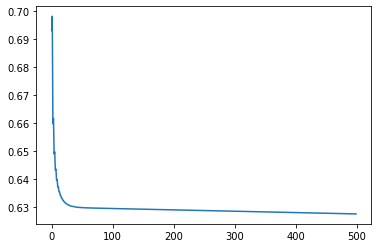

In [8]:
def gradient(theta, train_data, train_label):
    Hx = sigmoid(np.dot(train_data, theta)) # Hx.shape = (100, 1)
    gradient = np.dot(np.transpose(train_data), Hx - train_label)
    return gradient / len(train_label)

def compute_gradient_descent(theta, train_data, train_label, alpha=0.01, niter=1500):
    costs = []
    for _ in range(niter):
        cost = cost_function(theta, train_data, train_label)
        costs.append(cost)
        theta = theta - gradient(theta, train_data, train_label) * alpha 
    # Put your code
    # Put your code
    new_theta = theta
    return new_theta, costs

X_ = train_data[:, :2]
X = np.concatenate(
    (np.ones((train_data.shape[0], 1)), X_), axis=1)
y = train_data[:, 2, np.newaxis]

# CONSTANT
NITER = 500
ALPHA = 0.001

print('Expected gradient: [-0.10, -12.01, -11.26]')
print('Your gradient result: [%.2f, %.2f, %.2f]' % tuple(*gradient(np.zeros((3, 1)), X, y).T))

zero_theta = np.zeros((X.shape[1], 1))
new_theta, costs = compute_gradient_descent(zero_theta, X, y, ALPHA, NITER)
print('Expected model parameters: [-0.03, 0.01, 0.00]')
print('Your model parameters: [%.2f, %.2f, %.2f]' % tuple(*new_theta.T))

plt.plot(range(NITER), costs)

## Question 6. 주어진 데이터의 클래스를 구분 하는 선 (decision boundary)를 구하고, 데이터와 함께 그려서, 해당 선을 기준으로 데이터가 적절히 구분되는지 확인하세요. 데이터가 제대로 구분지어 지지 않는다면, gradient decision의 iteration을 100000으로 늘려서 시도해보세요.

모델 $H\_theta(x) = g(z)$에서 z >= 0, z < 0으로 입력 x에 대한 class를 결정하게 됩니다. 따라서 decision boundary는 z = 0이 됩니다. 해당 식을 그래프로 그려서 데이터를 구분 짓는지 확인해보세요.

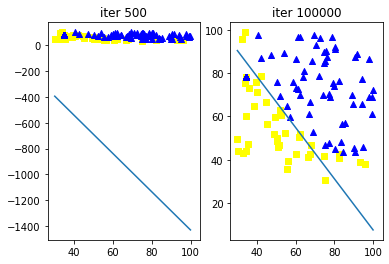

In [9]:
# Implement decision boundary
def decision_boundary(params, xrange):
    # Input: params - model parameters
    Xs = np.arange(int(xrange[0]), int(xrange[1]), 0.1)  #: xrange - x-axis's range
    Ys = [-params[1] * x/ params[2] - params[0]/params[2] for x in Xs] 
    plt.plot(Xs, Ys)
new_theta_500, _ = compute_gradient_descent(zero_theta, X, y, ALPHA, 500)
new_theta_100000, _ = compute_gradient_descent(zero_theta, X, y, ALPHA, 100000)

x1 = train_data[:, 0]
x2 = train_data[:, 1]
ax = plt.subplot(121)
ax.set_title('iter 500')
y0 = np.where(y == 0)
y1 = np.where(y == 1)
for y_ in y0:
    plt.scatter(x1[y_], x2[y_], color= 'yellow', marker='s')
for y_ in y1:
    plt.scatter(x1[y_], x2[y_], color='b', marker='^') 
decision_boundary(new_theta_500.flatten(), [30,100])
ax = plt.subplot(122)
ax.set_title('iter 100000')
for y_ in y0:
    plt.scatter(x1[y_], x2[y_], color= 'yellow', marker='s')
for y_ in y1:
    plt.scatter(x1[y_], x2[y_], color='b', marker='^') 
decision_boundary(new_theta_100000.flatten(), [30,100])

## Question 7. Newton's Method로 모델의 파라미터를 찾아보세요. 각 iteration에서 cost function이 어떻게 변하는지 그래프로 그려 확인해보세요. Question 4에서 구한 cost function의 변화와 어떻게 다른지 확인해보세요. 찾은 파라미터로 decision boundary를 question 5에서 처럼 그려서 확인해보세요.

Newton's method는 함수의 최소값을 찾을 때 쓰는 방법 중 하나로, feature의 수가 작을 때, 적은 수의 iteration으로 최적의 파라미터를 구할 수 있습니다.

$$ \theta := \theta - (Hess J)_{\theta}^{-1} * \bigtriangledown_{\theta}J(\theta) $$

$$ (Hess J)_{\theta_{i,j}} = {{\partial^2 J} \over {\partial \theta_{i} \partial \theta_{j}}} $$

**Hint** 
Hessian matrix (second-order partial derivative)를 구하는 방법에는 여러가지 방법이 있습니다.
- Second-order partial derviative 식을 직접 구하기
- Finite difference를 활용하는 방법

컴퓨터에서는 미분을 직접 구하기 힘들 경우, finite difference를 활용하여 계산합니다.
$gradient(t + \epsilon) - gradient(t) \over \epsilon$(\epsilon = 10^{-5}와 같이 작은 수)를 second-order partial derivative의 근사값으로 취급하여 사용하면 됩니다.
이와 관련해서 더 자세한 내용이 궁금하다면, [link](https://en.wikipedia.org/wiki/Finite_difference)를 참조하세요.


[[-22.78286292]
 [  0.18698716]
 [  0.18197882]]


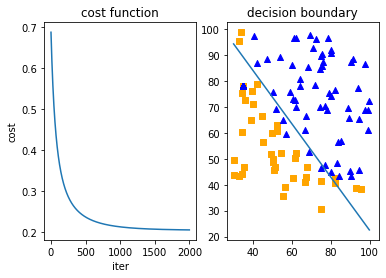

In [22]:
## Question 6. Decision boundary
# def gradient(theta, train_data, train_label):
theta_len = 3
Hessian = np.zeros((theta_len, theta_len), dtype="float32")
def newton_method(theta, train_data, train_label):
    Hx = sigmoid(np.dot(train_data, theta)) # Hx.shape = (100, 1)
    data_len = train_data.shape[0]
    theta_len = theta.shape[0]
    epsilon = pow(10, -5)
    for i in range(theta_len):
        for j in range(theta_len):
            Hessian[j][i] = np.sum(train_data[:,i] * train_data[:,j] * Hx * (1 - Hx)) / data_len
    new_theta = theta - np.linalg.inv(Hessian) @ gradient(theta, train_data, train_label)
    return new_theta
    
niter = 2000
newton_costs = []
theta = zero_theta
for i in range(niter):
    new_theta = newton_method(theta, X, y)
    cost = cost_function(new_theta, X, y)
    newton_costs.append(cost)
    theta = new_theta   
print(theta)
ax = plt.subplot(121)
ax.plot(range(niter), newton_costs)
ax.set_title('cost function')
ax.set_xlabel('iter')
ax.set_ylabel('cost')
ax = plt.subplot(122)
ax.set_title('decision boundary')
y0 = np.where(y == 0)
y1 = np.where(y == 1)
for y_ in y0:
    plt.scatter(x1[y_], x2[y_], color= 'orange', marker='s')
for y_ in y1:
    plt.scatter(x1[y_], x2[y_], color='b', marker='^') 
decision_boundary(new_theta.flatten(), [30,100])

## Question 8. Regularization을 사용하여 다음의 모델을 주어진 데이터(traindata.txt)에 맞춰 학습해봅시다. Regularization parameter를 변화하여 주어진 다양한 모델을 만들어보고 추가된 테스트 데이터(testdata.txt)에 대해서 정확도가 어떻게 되는지 그래프를 그려서 확인해봅시다.

$$ H_\theta(x) = \theta_0 + \theta_1 * x + \theta_2 * x ^ 2 + \theta_3 * x ^ 3 + \theta_4 * x ^ 4 + \theta_5 * x ^ 5 $$

Regularization을 사용하였을 때의 cost function과 gradient는 다음과 같습니다. Regularization의 목표는 feature의 영향을 줄이는 방향으로 최적화하는 것이므로, cost function의 regularization term에서는 $\theta_0$가 제외됩니다. 이에 따라, gradient는 j=0인 경우와 아닌 경우로 나누어 계산합니다. 

Cost function $$ J(\theta) = \frac{1}{2m}[\sum_{i=1}^{m} (H_\theta(x^{(i)}) - y^{(i)})^{2} + \lambda \sum_{j=1}^{n}\theta_{j}^{2}] $$

Gradient $ \frac{\partial J}{\partial \theta_j} $

$$ \frac{1}{m}\sum_{i=1}^{m} (H_\theta(x^{(i)}) - y^{(i)})x_j^{i} + \frac{1}{m} \lambda \theta_j $$ 

$$\frac{1}{m}\sum_{i=1}^{m} (H_\theta(x^{(i)}) - y^{(i)})x_0^{i}$$


Regulariation 정도를 조절하는 hyperparameter $\lambda$를 조절하며, 모델의 정확도가 어떻게 되는지 확인해보세요.

이번 문제에서는 구현의 편의성을 위해 scipy의 optimize 모듈을 사용하도록 합시다. optimize.minimize [link](https://docs.scipy.org/doc/scipy/reference/optimize.html) 함수를 사용하여 주어진 함수를 최소화하는 파라미터를 구할 수 있습니다.

scipy.optimize.minimize([link])(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)는 다음의 인자가 필요합니다. 보다 자세한 내용은 링크를 참조하세요.

- costFunction: 파라미터를 입력 받아 계산하는 함수입니다. 파라미터는 1차원의 array 형태로 넘겨줍니다. 즉,  costfunction의 theta를 row vector로 표현해야 합니다.
- initial_theta: costFunction의 초기 파라미터입니다. (row vector)
- args: (X, y, ...), 파라미터를 제외한 costFunction이 전달받을 인자입니다. 아래 코드에서는 입력데이터, 레이블, regularization parameter rp, 이렇게 (X, y, rp) 튜플을 사용합니다.
- jac: costFunction이 gradient를 cost값과 함께 반환하는지 여부의미
- method: optimization 방법
- options: 여러 변수들을 dictionary 형태로 전달, 아래에서는 maxiter를 사용하여 최대 iteration 회수를 지정하는데 사용합니다.

아래에 scipy.optimize 함수 사용 예시와 그래프 그리는 코드가 포함되어 있습니다. 코드를 살펴보고 필요한 기능들을 구현하여, regularization hyperparameter의 변화에 따라 모델이 어떻게 변하는지 확인하고, Regularization이 어떤 역할을 하는지 기술해주세요 (overfitting, underfitting이 언제 발생하나요?)

(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


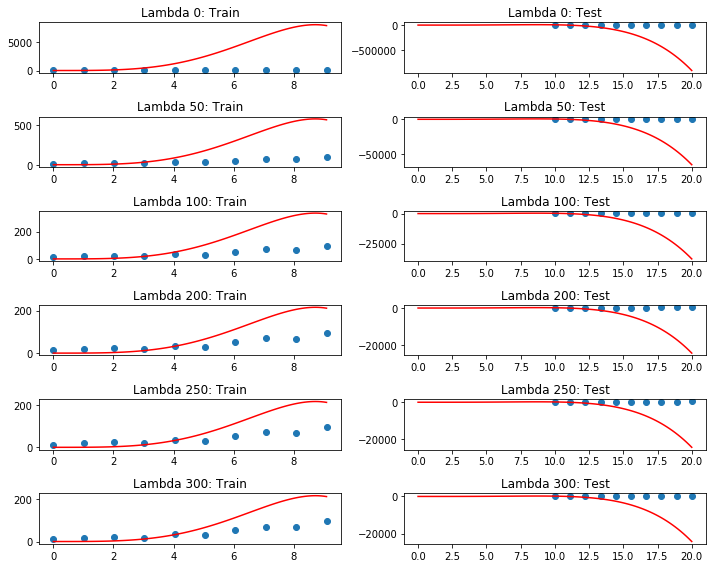

In [26]:
##########################################################
# Utility Functions
def gen_X(x, n_feature=5):
    data = [np.ones(x.shape)]
    for i in range(5):
        data.append(np.power(x, i+1))
    return np.stack(data, axis=-1)
##########################################################
# Test and train data

train_data = np.loadtxt('traindata.txt', delimiter=',')
test_data = np.loadtxt('testdata.txt', delimiter=',')

##########################################################
def cost_function(theta, X, y, reg_param=250):
    # theta.shape = (6, 1), Hx.shape = (10, 1), X.shape = (10, 6)
    print(y.shape) # (10, 1)
    theta = theta.reshape((len(theta), 1))
    lenX = X.shape[0]
    Hx = sigmoid(np.dot(X, theta)) 
    cost = (np.transpose(Hx - y) @ (Hx - y) + reg_param * np.transpose(theta) @ theta)/ (2 * lenX)
    grad =(np.transpose(X) @ (Hx - y) + reg_param * theta) / lenX
    return cost, grad.flatten()
    #return cost, gradient.flatten()

X = gen_X(train_data[:,0], 5)
y = train_data[:,1,np.newaxis]

# Optimization
from scipy import optimize
options = {'maxiter':1000}
n = X.shape[1]

regular_params = [0, 50, 100, 200, 250, 300]
fig, axes = plt.subplots(len(regular_params), 2, figsize=(10, 8))
for idx, rp in enumerate(regular_params):
    res = optimize.minimize(cost_function, np.zeros(n), (X, y, rp), jac=True, method='TNC', options=options)
    cost = res.fun
    theta = res.x
    # Plot train data
    ax = axes[idx][0]
    ax.scatter(X[:,1], y)
    ax.set_title('Lambda %d: Train' % rp)
    x_0 = np.linspace(0, max(train_data[:,0]), 100)
    X_0 = gen_X(x_0)
    ax.plot(x_0, np.dot(X_0, theta.reshape((theta.shape[0], 1))), 'r')
    # Plot test data
    ax = axes[idx][1]
    ax.set_title('Lambda %d: Test' % rp)
    X_test = gen_X(test_data[:, 0], 5)
    y_test = test_data[:, 1, np.newaxis]
    ax.scatter(X_test[:, 1], y_test)
    X_test_lin = gen_X(np.linspace(0, max(X_test[:, 1]), 100))
    ax.plot(X_test_lin[:, 1], np.dot(X_test_lin, theta.reshape((theta.shape[0], 1))), 'r')
fig.tight_layout()